In [1]:
%pip install jupyterlab pandas yfinance matplotlib statsmodels numpy scipy pmdarima

  Using cached jupyterlab-4.2.5-py3-none-any.whl.metadata (16 kB)
  Using cached yfinance-0.2.43-py2.py3-none-any.whl.metadata (11 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.14.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached lxml-5.3.0-cp311-cp311-win_amd64.whl.metadata (3.9 kB)
  Using cached frozendict-2.4.4-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.met


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

In [3]:
# Buscando os dados da ação da Apple
dogecoin = yf.Ticker('DOGE-USD')
dogecoin_data = dogecoin.history(period='1y')
dogecoin_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-23 00:00:00+00:00,0.061528,0.061846,0.061378,0.061507,117222607,0.0,0.0
2023-09-24 00:00:00+00:00,0.061507,0.061743,0.060702,0.060743,115250326,0.0,0.0
2023-09-25 00:00:00+00:00,0.060742,0.061200,0.060545,0.060959,117409471,0.0,0.0
2023-09-26 00:00:00+00:00,0.060956,0.061116,0.059907,0.060599,141794234,0.0,0.0
2023-09-27 00:00:00+00:00,0.060593,0.061332,0.060275,0.060504,153818653,0.0,0.0


In [4]:
dogecoin_data.reset_index(inplace=True)

In [5]:
dogecoin_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [6]:
# Supondo que sua coluna se chama 'Date'
dogecoin_data['Date'] = pd.to_datetime(dogecoin_data['Date'])

In [7]:
dogecoin_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-09-23 00:00:00+00:00,0.061528,0.061846,0.061378,0.061507,117222607,0.0,0.0
1,2023-09-24 00:00:00+00:00,0.061507,0.061743,0.060702,0.060743,115250326,0.0,0.0
2,2023-09-25 00:00:00+00:00,0.060742,0.061200,0.060545,0.060959,117409471,0.0,0.0
3,2023-09-26 00:00:00+00:00,0.060956,0.061116,0.059907,0.060599,141794234,0.0,0.0
4,2023-09-27 00:00:00+00:00,0.060593,0.061332,0.060275,0.060504,153818653,0.0,0.0


In [8]:
print('Tipo dos dados:', type(dogecoin_data))
print('Dimensões dos dados:', dogecoin_data.shape)
print('Colunas dos dados:', dogecoin_data.columns)
print('Informações dos dados:', dogecoin_data.info())

Tipo dos dados: <class 'pandas.core.frame.DataFrame'>
Dimensões dos dados: (367, 8)
Colunas dos dados: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          367 non-null    datetime64[ns, UTC]
 1   Open          367 non-null    float64            
 2   High          367 non-null    float64            
 3   Low           367 non-null    float64            
 4   Close         367 non-null    float64            
 5   Volume        367 non-null    int64              
 6   Dividends     367 non-null    float64            
 7   Stock Splits  367 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 23.1 KB
Informações dos dados: None


In [9]:
print('Tipo do índice:', type(dogecoin_data.index))

Tipo do índice: <class 'pandas.core.indexes.range.RangeIndex'>


In [10]:
print('Valores do índice:', dogecoin_data.index)

Valores do índice: RangeIndex(start=0, stop=367, step=1)


<Axes: title={'center': 'Preço de Fechamento da Ação'}>

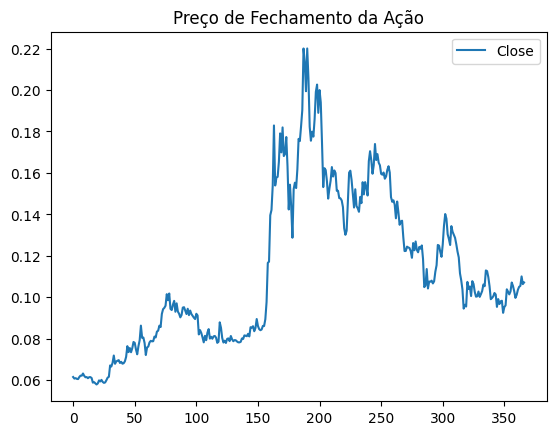

In [11]:
dogecoin_data.plot(y='Close', title='Preço de Fechamento da Ação')

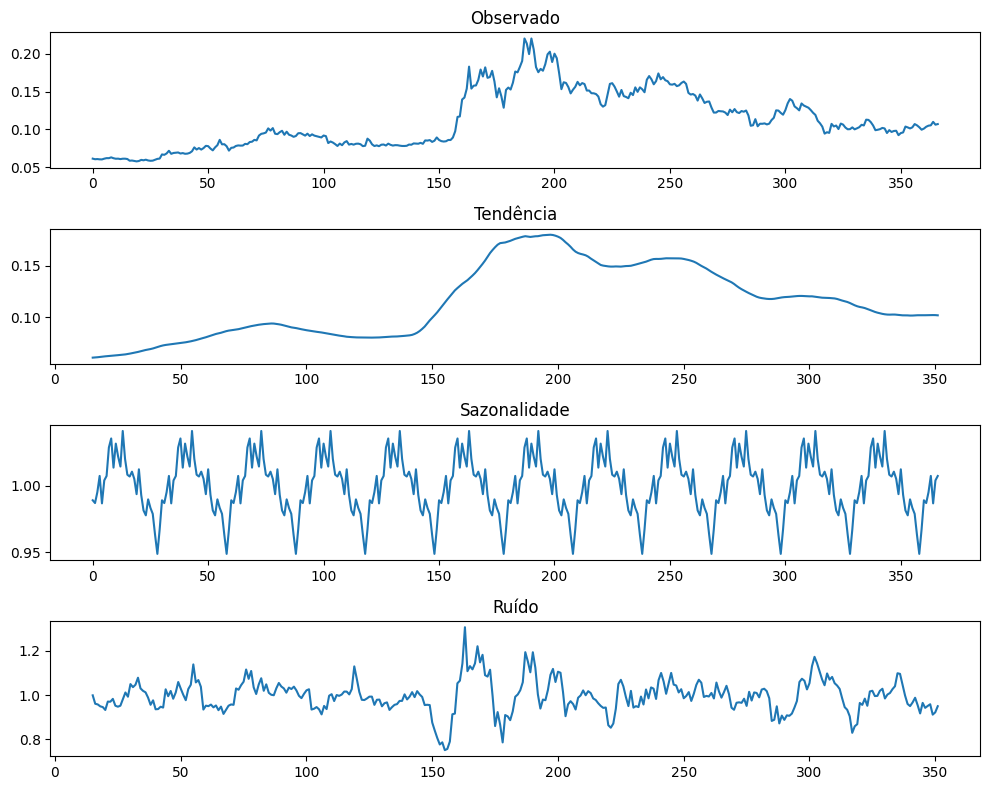

In [12]:
# Decompondo a série temporal
decomposition = seasonal_decompose(dogecoin_data['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observado')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Ruído')
plt.tight_layout()

In [13]:
# Teste de Dickey-Fuller
result = adfuller(dogecoin_data['Close'])
print('Estatística do teste:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])

Estatística do teste: -1.8586263833436893
Valor-p: 0.3517677081276192
Valores críticos: {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}


Dado que os resultados indicam que a série é não estacionaria, será necessario transformar a serie em uma série estacionaria para realizar a modelagem do usando ARIMA

<Axes: title={'center': 'Diferença dos Dados'}>

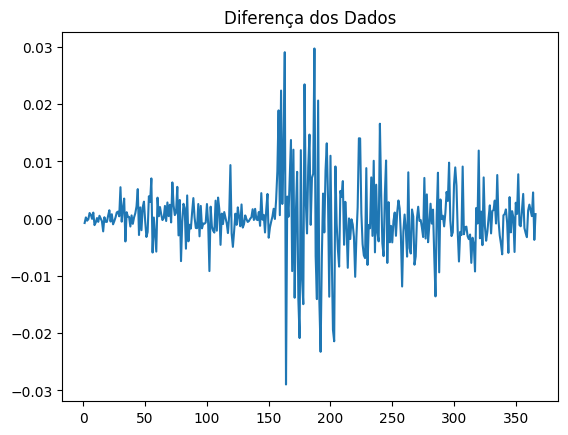

In [14]:
# Diferenciando os dados
dogecoin_data['Close_diff'] = dogecoin_data['Close'].diff()
dogecoin_data['Close_diff'].plot(title='Diferença dos Dados')

In [15]:
# Teste de Dickey-Fuller
result = adfuller(dogecoin_data['Close_diff'].dropna())
print('Estatística do teste:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])

Estatística do teste: -5.494400321508123
Valor-p: 2.1395074947353664e-06
Valores críticos: {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}


In [16]:
data = dogecoin_data['Close']

Normalização dos dados

In [17]:
import math
import numpy as np

df_max_scaled = dogecoin_data.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns:
    if column != "Date":
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
# view normalized data 
display(df_max_scaled)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff
0,2023-09-23 00:00:00+00:00,0.279590,0.272953,0.293942,0.279496,0.012513,NaN,NaN,NaN
1,2023-09-24 00:00:00+00:00,0.279495,0.272499,0.290704,0.276024,0.012302,NaN,NaN,-0.025701
2,2023-09-25 00:00:00+00:00,0.276018,0.270102,0.289953,0.277006,0.012533,NaN,NaN,0.007266
3,2023-09-26 00:00:00+00:00,0.276991,0.269731,0.286897,0.275370,0.015136,NaN,NaN,-0.012111
4,2023-09-27 00:00:00+00:00,0.275341,0.270685,0.288660,0.274938,0.016419,NaN,NaN,-0.003196
...,...,...,...,...,...,...,...,...,...
362,2024-09-19 00:00:00+00:00,0.470702,0.472564,0.496073,0.477275,0.070080,NaN,NaN,0.048644
363,2024-09-20 00:00:00+00:00,0.477273,0.473544,0.496854,0.479274,0.063528,NaN,NaN,0.014802
364,2024-09-21 00:00:00+00:00,0.479272,0.487124,0.498788,0.500077,0.053618,NaN,NaN,0.154007
365,2024-09-22 00:00:00+00:00,0.500075,0.485698,0.498156,0.483219,0.051338,NaN,NaN,-0.124807


In [21]:
# Remover a primeira linha do dataset
dogecoin_data = dogecoin_data.drop(dogecoin_data.index[0])

dogecoin_data = dogecoin_data.drop(columns=['Dividends', 'Stock Splits'])

dogecoin_data.head()

,Date,Open,High,Low,Close,Volume,Close_diff
1,2023-09-19 00:00:00+00:00,0.062016,0.063215,0.061974,0.062709,198507548,0.000693
2,2023-09-20 00:00:00+00:00,0.062709,0.063009,0.061965,0.062630,187443142,-0.000079
3,2023-09-21 00:00:00+00:00,0.062629,0.063307,0.061282,0.061346,518556615,-0.001284
4,2023-09-22 00:00:00+00:00,0.061345,0.061829,0.061054,0.061531,144488200,0.000185
5,2023-09-23 00:00:00+00:00,0.061528,0.061846,0.061378,0.061507,117222607,-0.000024


In [25]:
# # Ajustar o modelo ARIMA automaticamente
# model = pm.auto_arima(data, seasonal=False, stepwise=True, suppress_warnings=True, trace=True)

# # Prever os próximos 30 dias (ou qualquer outro período que você desejar)
# n_periods = 30
# forecast = model.predict(n_periods=n_periods)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2667.557, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2662.670, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2661.480, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2661.546, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2664.567, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2660.011, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2656.670, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2664.213, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2663.341, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2661.468, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2664.812, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2664.046, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2660.839, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-2669.845, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0

In [26]:
# # Criar um DataFrame para armazenar os preços reais e previstos
# df_forecast = pd.DataFrame({
#     'Actual': np.nan,
#     'Forecast': forecast
# }, index=pd.date_range(start=data.index[-1], periods=n_periods + 1, freq='D')[1:])

# # Combinar os dados reais com as previsões
# df_combined = pd.concat([data, df_forecast])

# # Sinais de compra e venda
# df_combined['Signal'] = np.where(df_combined['Forecast'] > df_combined['Actual'].shift(1), 'Buy', 'Sell')

# # Visualizar os sinais
# print(df_combined[['Forecast', 'Signal']])

                               Forecast Signal
0                                   NaN   Sell
1                                   NaN   Sell
2                                   NaN   Sell
3                                   NaN   Sell
4                                   NaN   Sell
...                                 ...    ...
1970-01-27 00:00:00.000000366       NaN   Sell
1970-01-28 00:00:00.000000366       NaN   Sell
1970-01-29 00:00:00.000000366       NaN   Sell
1970-01-30 00:00:00.000000366       NaN   Sell
1970-01-31 00:00:00.000000366       NaN   Sell

[397 rows x 2 columns]


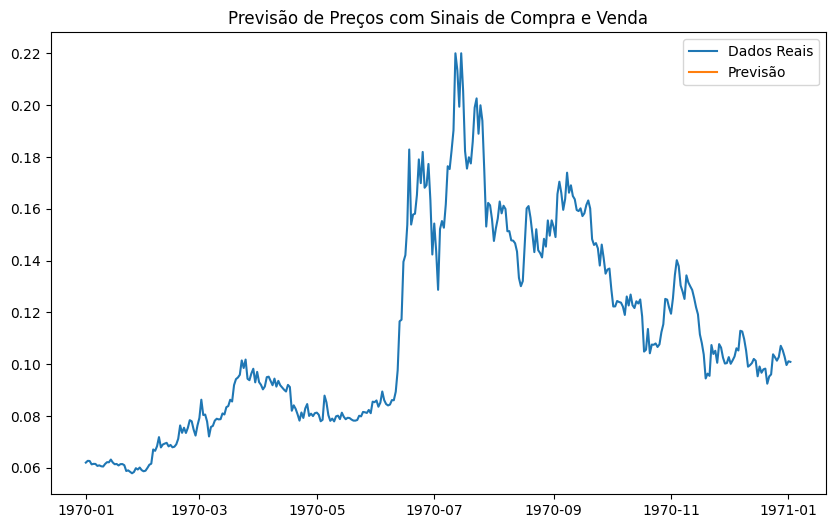

In [27]:
# # Plotar os dados e os sinais
# plt.figure(figsize=(10,6))
# plt.plot(data, label='Dados Reais')
# plt.plot(df_forecast['Forecast'], label='Previsão')
# plt.title('Previsão de Preços com Sinais de Compra e Venda')
# plt.legend()
# plt.show()

In [28]:
import pmdarima as pm
# Ajustar o modelo usando auto_arima
model = pm.auto_arima(data, 
                      seasonal=False,     # Definir sazonalidade como False se não houver periodicidade clara
                      stepwise=True,      # Utiliza uma busca eficiente de parâmetros
                      suppress_warnings=True, 
                      trace=True)         # Mostrar progresso

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2667.557, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2662.670, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2661.480, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2661.546, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2664.567, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2660.011, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2656.670, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2664.213, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2663.341, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2661.468, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2664.812, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2664.046, Time=0.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2660.839, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-2669.845, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0

In [29]:
# Prever os próximos 30 dias
future_forecast = model.predict(n_periods=30)

# Exibir a previsão
print(future_forecast)

367    0.100744
368    0.101087
369    0.101079
370    0.100826
371    0.100934
372    0.101079
373    0.100940
374    0.100888
375    0.101013
376    0.101001
377    0.100913
378    0.100957
379    0.101005
380    0.100953
381    0.100938
382    0.100983
383    0.100976
384    0.100945
385    0.100963
386    0.100979
387    0.100959
388    0.100955
389    0.100971
390    0.100968
391    0.100957
392    0.100964
393    0.100969
394    0.100962
395    0.100961
396    0.100967
dtype: float64


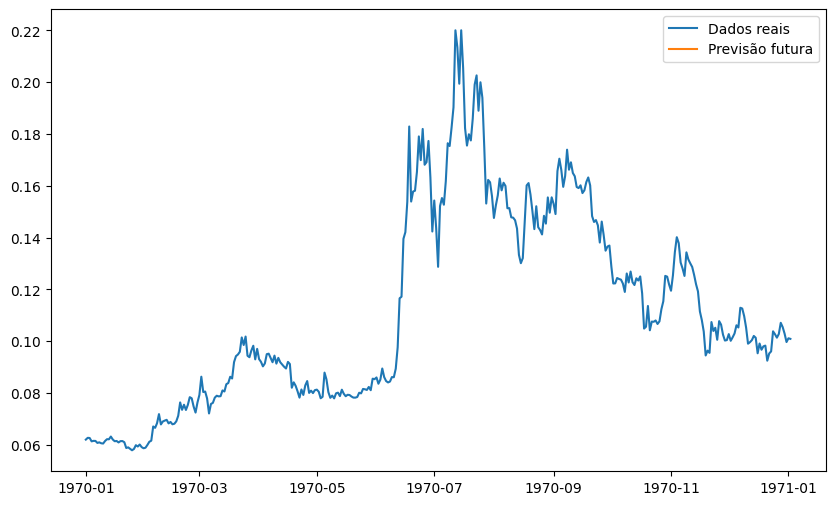

In [30]:
import matplotlib.pyplot as plt

# Plotar os dados reais e as previsões
plt.figure(figsize=(10,6))
plt.plot(data, label='Dados reais')
plt.plot(pd.Series(future_forecast, index=pd.date_range(start=data.index[-1], periods=30, freq='D')), label='Previsão futura')
plt.legend()
plt.show()